In [96]:
import pandas as pd
us = pd.read_csv("US_stocks.csv")
tw = pd.read_csv("taiwan_stocks.csv")
print(us)
print(tw)

     ID                                      name  share
0  AAPL                                Apple Inc.      2
1   IEF  iShares Barclays 7-10 Year Trasry Bnd Fd      2
2  MSFT                     Microsoft Corporation      1
3   SHY  iShares Barclays 1-3 Year Treasry Bnd Fd      2
4   SPY                    SPDR S&P 500 ETF Trust      3
5   VOO       VANGUARD IX FUN/S&P 500 ETF SHS NEW      0
     ID name  share
0  1904   正隆   1225
1  2303   聯電    432
2  2323   中環    242
3  2330  台積電      0
4  2353   宏碁    850
5  2376   技嘉    518
6  2382   廣達    496
7  3231   緯創    130


In [18]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import time

#datestr = time.strftime("%Y%m%d", time.localtime())
datestr = '20200320'

# 下載股價
r = requests.post('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + datestr + '&type=ALL')

# 整理資料，變成表格
df = pd.read_csv(StringIO(r.text.replace("=", "")), header=["證券代號" in l for l in r.text.split("\n")].index(True)-1)
name = df["證券名稱"]
ID = df["證券代號"]
# 整理一些字串：
df = df.apply(lambda s: pd.to_numeric(s.astype(str).str.replace(",", "").replace("+", "1").replace("-", "-1"), errors='coerce'))
df["證券名稱"] = name
df["證券代號"] = ID
# 顯示出來
df.head()

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Unnamed: 16
0,0050,元大台灣50,40910533,20786,2966513589,71.00,74.00,70.90,74.00,1.0,5.45,73.95,410,74.00,245,0.0,NaN
1,0051,元大中型100,130150,82,3379080,24.91,26.39,24.91,25.94,1.0,1.16,25.93,10,26.12,5,0.0,NaN
2,0052,富邦科技,228555,106,12841819,55.00,57.30,54.90,56.40,1.0,4.15,56.40,2,56.80,2,0.0,NaN
3,0053,元大電子,72010,38,2350225,31.97,32.90,31.97,32.80,1.0,2.00,32.81,2,32.88,3,0.0,NaN
4,0054,元大台商50,22000,9,404030,18.05,18.47,18.05,18.47,1.0,0.96,18.47,1,18.50,1,0.0,NaN


In [103]:
#持股清單
us_list = us['ID'].tolist()
tw_list = tw['ID'].apply(lambda s: str(s) + '.tw').tolist()
us_share = us['share'].tolist()
tw_share = tw['share'].tolist()
all_list = us_list + tw_list
all_share = us_share+tw_share
all_share

[2, 2, 1, 2, 3, 0, 1225, 432, 242, 0, 850, 518, 496, 130]

In [85]:
#抓取股票價格
import yfinance as yf
import matplotlib.pyplot as plt
import time
%matplotlib inline

datestr = time.strftime("%Y-%m-%d", time.localtime())

#tickers = all_list
start_date = '2018-03-01'
end_date = datestr
tw_data = yf.download(tickers = tw_list, start = start_date, end = end_date)['Adj Close']
us_data = yf.download(tickers = us_list, start = start_date, end = end_date)['Adj Close']

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  6 of 6 completed


In [90]:
import twder
usd = float(twder.now('USD')[2])

In [120]:
us_equity = (us_data.values * usd)*(np.array(us_share))
tw_equity = tw_data.values * np.array(tw_share)
us_sum = us_equity[us_equity.shape[0] - 1].sum()
tw_sum = tw_equity[tw_equity.shape[0] - 1].sum()
us_sum + tw_sum

144250.2754573822

In [119]:
(np.array(us_share))

array([2, 2, 1, 2, 3, 0])

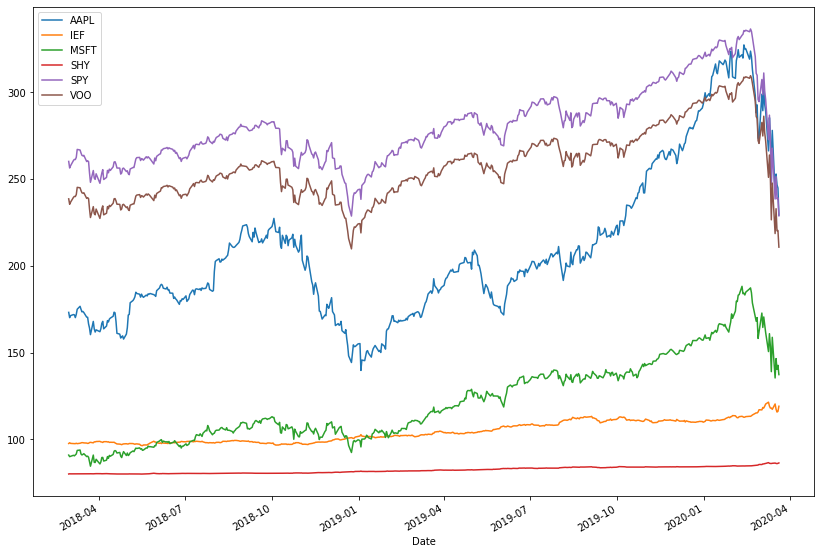

In [100]:
us_data.plot(figsize=(14,10))

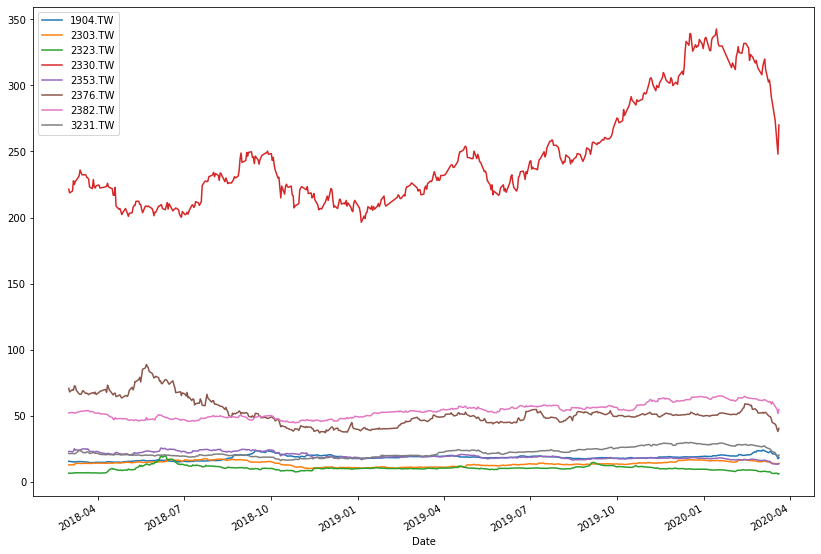

In [101]:
tw_data.plot(figsize=(14,10))